In [1]:
%matplotlib inline
import sys
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from pycm import ConfusionMatrix

plt.rcParams.update({'figure.figsize': (15,15)})
SEED = 199510
np.random.seed(SEED)

map_7_classes = {
    0: 'normal_superficiel',
    1: 'normal_intermediate',
    2: 'normal_columnar',
    3: 'light_dysplastic',
    4: 'moderate_dysplastic',
    5: 'severe_dysplastic',
    6: 'carcinoma_in_situ'
}

map_2_classes = {
    0: 'normal',
    1: 'anormal'
}

ROOT_DIR = pathlib.Path().resolve().parent
DATA_DIR = ROOT_DIR / "Data" / "smear2005"
print(ROOT_DIR)
sys.path.append(str(ROOT_DIR))
from Scripts import utils

C:\Users\marco\Documents\Trabajo\Academia\curso_cisc_2022


In [2]:

df = pd.read_csv(f'{DATA_DIR}/dataset.csv')
dataset = df.drop(["Class", "ID", "Class_cat_7", "Class_num_7", "Class_cat_2", "Class_num_2", "filename"], axis=1)

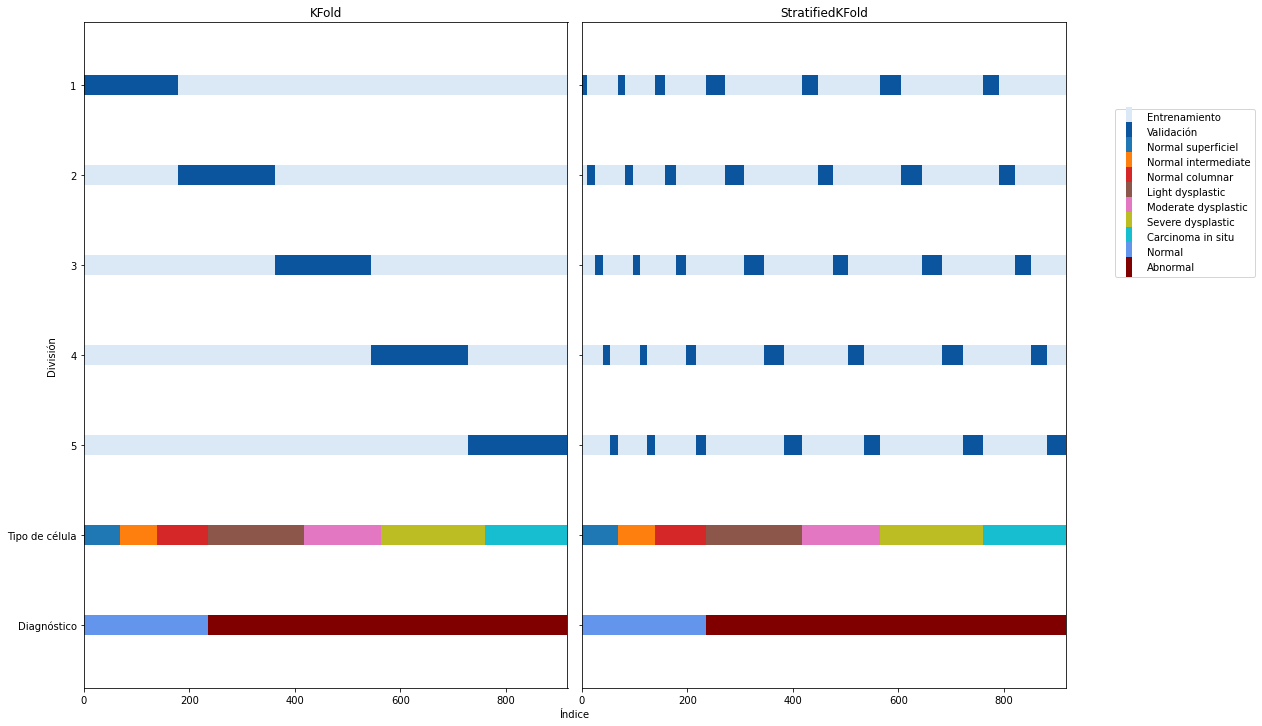

In [3]:
KFOLDS = 5

df_kfold = df.sort_values(by=[f"Class_num_7"])

kf = KFold(n_splits=KFOLDS)

skf = StratifiedKFold(n_splits=KFOLDS)

utils.plot_kfold_subplot(
    kf,
    skf,
    df_kfold["ID"],
    df_kfold["Class_cat_7"],
    n_splits=KFOLDS,
    lw=20,
    figsize=(15, 10),
)


In [4]:
X = dataset.values
y = df["Class_cat_2"].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=SEED, stratify=y)

In [5]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('MLP1', MLPClassifier()))
models.append(('MLP2', MLPClassifier(hidden_layer_sizes=(100,100))))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print(f"{name}: {cv_results.mean()} +/- ({cv_results.std()})")


LR: 0.9371899296556829 +/- (0.03423286896635149)
LDA: 0.9359311366160682 +/- (0.025864767296950718)
KNN: 0.90312847093669 +/- (0.02155556499456821)
CART: 0.9141058867086265 +/- (0.034998205819794646)
NB: 0.9127730470196223 +/- (0.02779571563446348)
SVM: 0.7367271380970012 +/- (0.00458087907307691)
MLP1: 0.8841169937060348 +/- (0.05380999866078904)
MLP2: 0.9045168456127362 +/- (0.03884440224125249)


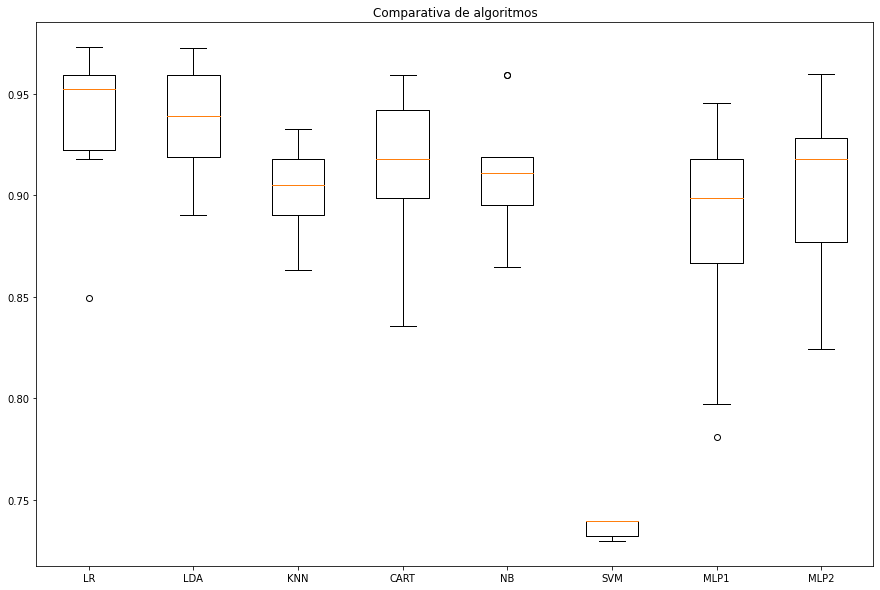

In [6]:
plt.figure(figsize=(15,10))
plt.boxplot(results, labels=names)
plt.title('Comparativa de algoritmos')
plt.show()

In [7]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [8]:
df_pred = pd.DataFrame({"Real": Y_validation, "Pred": predictions})
df_pred = df_pred.replace(map_2_classes)
df_error = df_pred[df_pred["Real"] != df_pred["Pred"]]
print(len(df_error.index))

12


In [9]:
df_error.groupby("Pred").size()

Pred
anormal    9
normal     3
dtype: int64

In [10]:
cm = ConfusionMatrix(actual_vector=Y_validation, predict_vector=predictions)
print(cm)

Predict       anormal       normal        
Actual
anormal       132           3             

normal        9             40            





Overall Statistics : 

95% CI                                                            (0.89911,0.97046)
ACC Macro                                                         0.93478
ARI                                                               0.73918
AUNP                                                              0.89705
AUNU                                                              0.89705
Bangdiwala B                                                      0.89982
Bennett S                                                         0.86957
CBA                                                               0.87625
CSI                                                               0.83025
Chi-Squared                                                       126.59461
Chi-Squared DF                                                    1
Conditional Ent

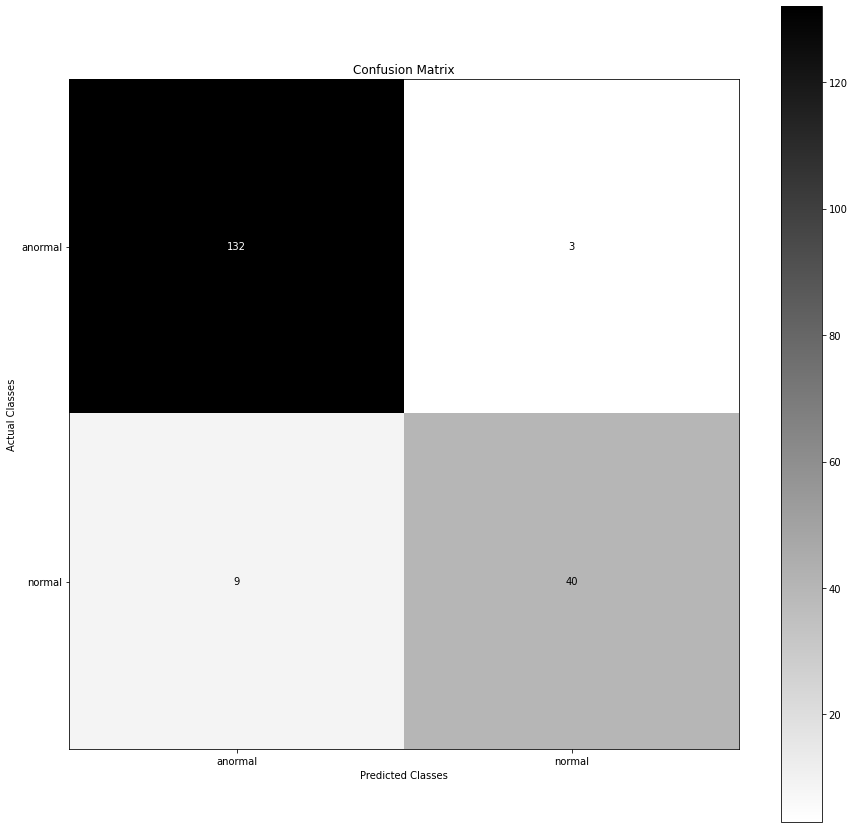

In [11]:
cm.plot(number_label=True);

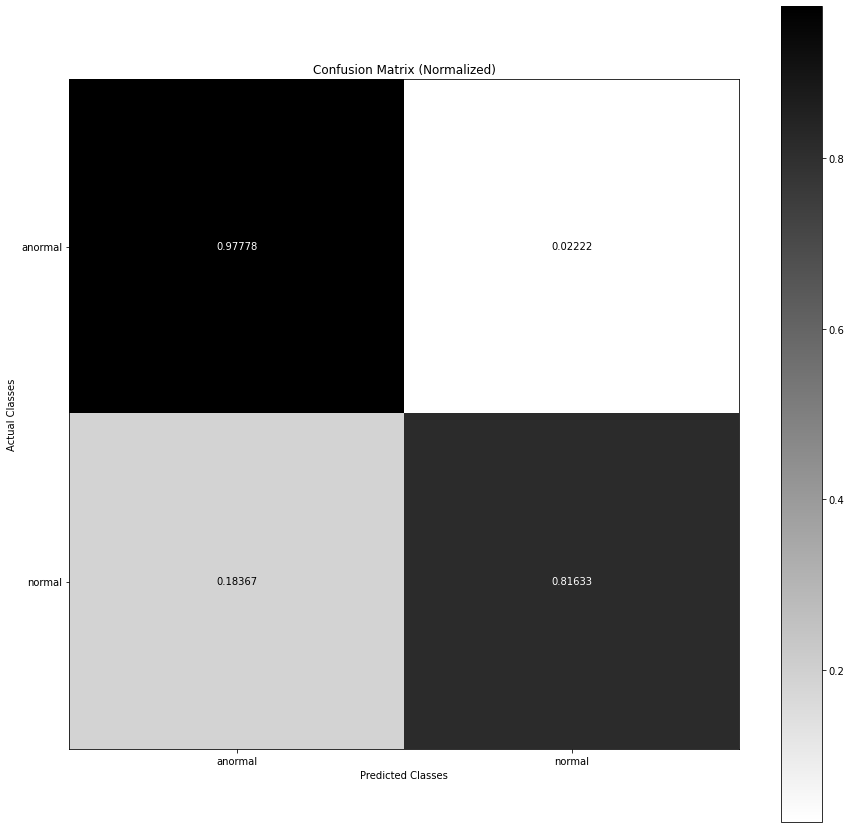

In [12]:
cm.plot(number_label=True, normalized=True);

In [13]:
X = dataset.values
y = df["Class_cat_7"].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=SEED, stratify=y)

In [14]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('MLP1', MLPClassifier()))
models.append(('MLP2', MLPClassifier(hidden_layer_sizes=(100,100))))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print(f"{name}: {cv_results.mean()} +/- ({cv_results.std()})")

LR: 0.6153276564235468 +/- (0.052889669164178504)
LDA: 0.6356904850055536 +/- (0.051651386108115156)
KNN: 0.48839318770825624 +/- (0.038714790707001574)
CART: 0.5455942243613476 +/- (0.0377418294264462)
NB: 0.5346908552388004 +/- (0.04508828410306433)
SVM: 0.21421695668271012 +/- (0.007022632790755231)
MLP1: 0.4883006293965198 +/- (0.057261440245724236)
MLP2: 0.5372824879674195 +/- (0.05848022530680384)


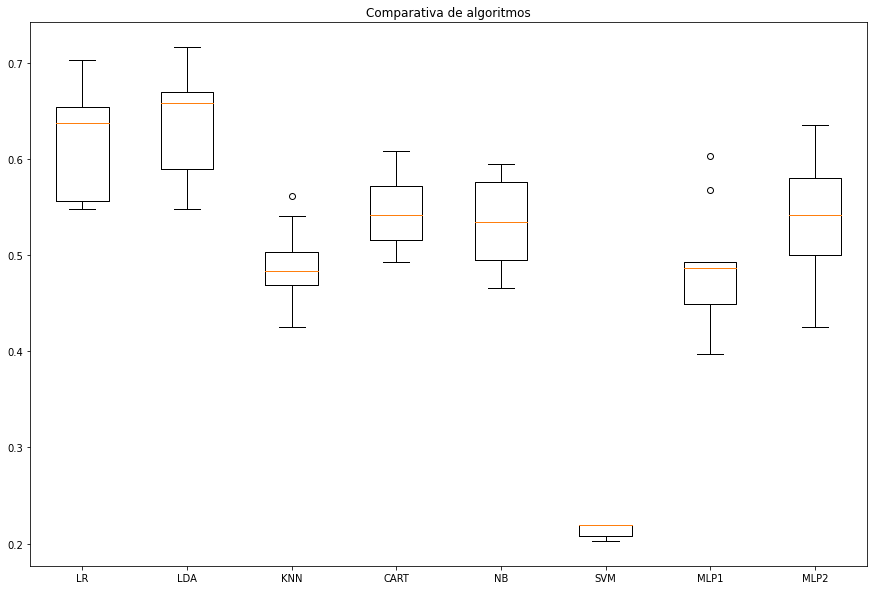

In [15]:
plt.figure(figsize=(15,10))
plt.boxplot(results, labels=names)
plt.title('Comparativa de algoritmos')
plt.show()

In [16]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [17]:
df_pred = pd.DataFrame({"Real": Y_validation, "Pred": predictions})
df_pred = df_pred.replace(map_2_classes)
df_error = df_pred[df_pred["Real"] != df_pred["Pred"]]
print(len(df_error.index))

69


In [18]:
df_error.groupby("Pred").size()

Pred
carcinoma_in_situ      13
light_dysplastic        8
moderate_dysplastic    13
normal_columnar         6
normal_intermediate     5
normal_superficiel      1
severe_dysplastic      23
dtype: int64

In [19]:
cm = ConfusionMatrix(actual_vector=Y_validation, predict_vector=predictions)
print(cm)

Predict                   carcinoma_in_situ         light_dysplastic          moderate_dysplastic       normal_columnar           normal_intermediate       normal_superficiel        severe_dysplastic         
Actual
carcinoma_in_situ         21                        0                         1                         0                         0                         0                         8                         

light_dysplastic          0                         26                        5                         0                         1                         0                         4                         

moderate_dysplastic       1                         7                         16                        1                         0                         0                         4                         

normal_columnar           1                         0                         1                         11                        0                       

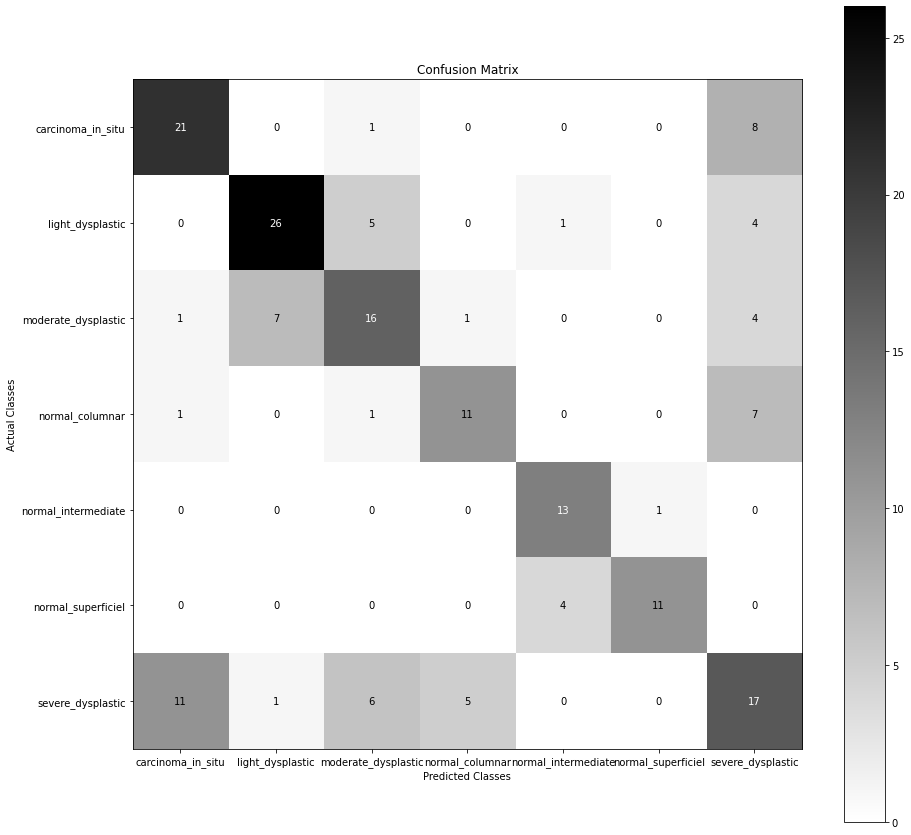

In [20]:
cm.plot(number_label=True);

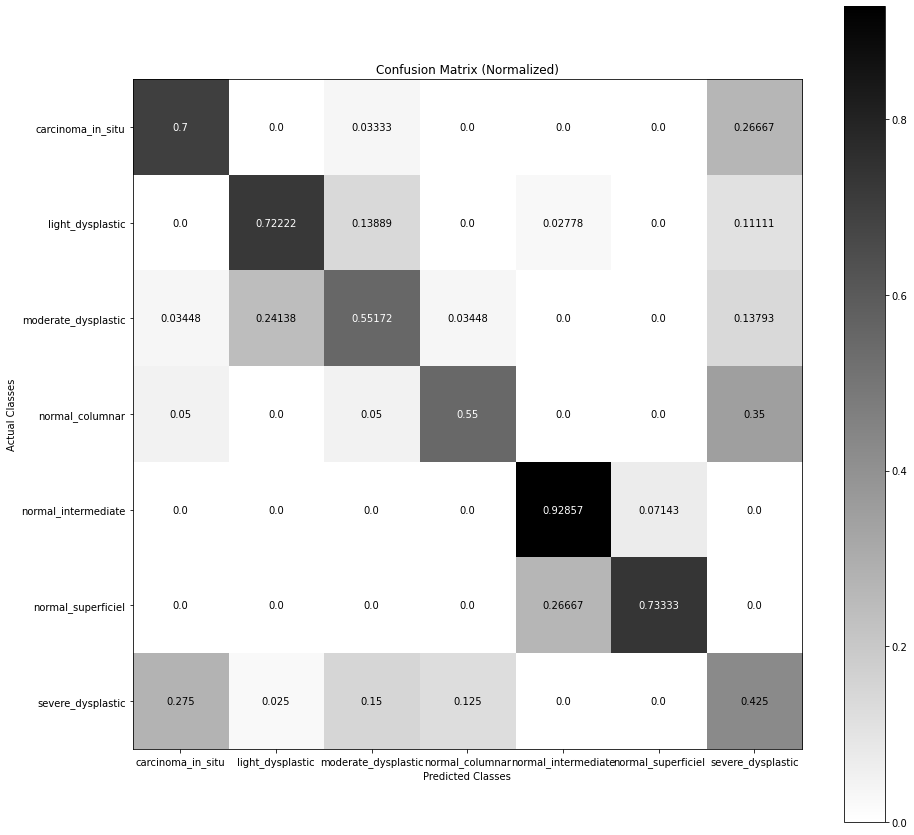

In [21]:
cm.plot(number_label=True, normalized=True);